In [ ]:
pip install -q keras-nlp

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow import keras
import keras_nlp
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageFile, UnidentifiedImageError

In [3]:
df_train = pd.read_csv('/kaggle/input/multioff-dataset/MultiOFF/Split Dataset/Training_meme_dataset.csv')
img_folder = '/kaggle/input/multioff-dataset/MultiOFF/Labelled Images'
target_shape = (224, 224)

df_train['label'] = df_train['label'].replace({'offensive': 1,'Non-offensiv': 0})
# df['humour'] = df['humour'].replace({'not_funny': 0, 'funny': 1, 'very_funny': 1, 'hilarious' : 1})
# df['sarcasm'] = df['sarcasm'].replace({'not_sarcastic': 0, 'twisted_meaning': 1, 'general' : 1, 'little_sarcastic' : 1, 'very_sarcastic' : 1, 'very_twisted' : 1})
# df['offensive'] = df['offensive'].replace({'not_offensive': 0, 'offensive': 1, 'slight' : 1, 'very_offensive' : 1, 'hateful_offensive': 1})
# df['motivational'] = df['motivational'].replace({'not_motivational': 0, 'motivational': 1})

for index, row in df_train.iterrows():
    if pd.isna(row['sentence']):
        df_train.at[index, 'sentence'] = '.'

/tmp/ipykernel_1750/2305410074.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['label'] = df_train['label'].replace({'offensive': 1,'Non-offensiv': 0})


In [4]:
df_train['label'].value_counts()

label
0    258
1    187
Name: count, dtype: int64

In [5]:
df_val = pd.read_csv('/kaggle/input/multioff-dataset/MultiOFF/Split Dataset/Validation_meme_dataset.csv')
df_val['label'] = df_val['label'].replace({'offensive': 1,'Non-offensiv': 0})
for index, row in df_val.iterrows():
    if pd.isna(row['sentence']):
        df_val.at[index, 'sentence'] = '.'

/tmp/ipykernel_1750/1410767554.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_val['label'] = df_val['label'].replace({'offensive': 1,'Non-offensiv': 0})


In [6]:
df_val['label'].value_counts()

label
0    91
1    58
Name: count, dtype: int64

In [7]:
df = pd.concat([df_train, df_val], axis=0).reset_index(drop=True)

In [8]:
df['label'].value_counts()

label
0    349
1    245
Name: count, dtype: int64

In [9]:
grouped = df.groupby('label')
min_size = grouped.size().max()
min_size 

349

In [10]:
df = grouped.apply(lambda x: x.sample(min_size, replace=True)).reset_index(drop=True)

/tmp/ipykernel_1750/870976926.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = grouped.apply(lambda x: x.sample(min_size, replace=True)).reset_index(drop=True)


In [11]:
#X_train_txt
X_train_txt = df['sentence']
X_train_txt = X_train_txt.tolist()
X_train_txt = [s.replace('\n', ' ') for s in X_train_txt]

In [22]:
ImageFile.LOAD_TRUNCATED_IMAGES = True
images = []
#X_train_image
for index,row in df.iterrows():
    img_path = os.path.join(img_folder, str(row['image_name']))
    image = Image.open(img_path) 
    image = image.convert('RGB')    
    image = image.resize(target_shape)
    image_array = np.array(image)
    images.append(image)

In [23]:
len(df)

698

In [24]:
X_train_img = np.array(images)

In [25]:
len(X_train_img)

698

In [17]:
Y_train = df['label']
print(Y_train.value_counts())
Y_train = np.array(Y_train, dtype=np.int32)

label
0    349
1    349
Name: count, dtype: int64


In [18]:
len(X_train_txt)

698

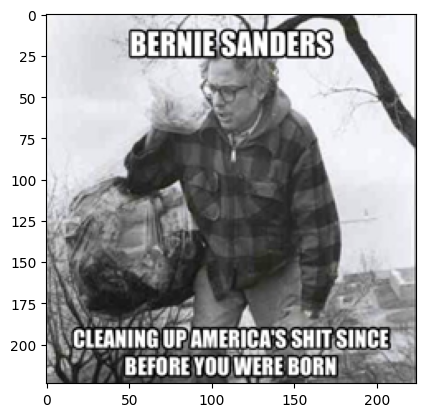

In [26]:
plt.imshow(X_train_img[200])

In [27]:
X_train_txt[200]

"BERNIE SANDERS CLEANING UPAMERICA 'S SHIT SINCE BEFORE YOUWERE BORN "

In [28]:
len(Y_train)

698

In [29]:
df_test = pd.read_csv('/kaggle/input/multioff-dataset/MultiOFF/Split Dataset/Testing_meme_dataset.csv')
df_test['label'] = df_test['label'].replace({'offensive': 1, 'Non-offensiv': 0})

for index, row in df_test.iterrows():
    if pd.isna(row['sentence']):
        df_test.at[index, 'sentence'] = '.'

/tmp/ipykernel_1750/769595000.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['label'] = df_test['label'].replace({'offensive': 1, 'Non-offensiv': 0})


In [30]:
df_test['label'].value_counts()

label
0    91
1    58
Name: count, dtype: int64

In [31]:
X_test_txt = df_test['sentence']
X_test_txt = X_test_txt.tolist()
X_test_txt = [s.replace('\n', ' ') for s in X_test_txt]

In [32]:
len(X_test_txt)

149

In [33]:
images_test = []
for index,row in df_test.iterrows():
    img_path = os.path.join(img_folder, str(row['image_name']))
    image = Image.open(img_path)
    image = image.convert('RGB')    
    image = image.resize(target_shape)
    image_array = np.array(image)
    images_test.append(image)

In [34]:
X_test_img = np.array(images_test)

In [35]:
len(X_test_img)

149

In [36]:
Y_test = df_test['label']

In [37]:
len(Y_test)

149

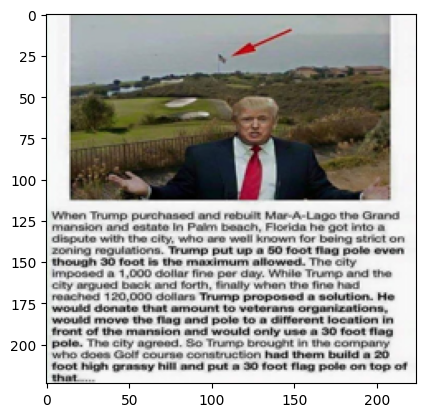

In [38]:
plt.imshow(X_test_img[51])

In [39]:
X_test_txt[51]

'When Trump purchased and rebuilt Mar-A-Lago the Grand mansion and estate In Palm beach , Florida he got into a dispute with the city , who are well known for being strict on zoning regulations . Trump put up a 50 foot flag pole even though 30 foot is the maximum allowed . The city imposed a 1,000 dollar fine per day . While Trump and the city argued back and forth , finally when the fine had reached 120,000 dollars Trump proposed a solution . He would donate that amount to veterans organizations , would move the flag and pole to a different location in front of the mansion and would only use a 30 foot flag pole . The city agreed . So Trump brought in the company who does Golf course construction had them build a 20 foot high grassy hill and put a 30 foot flag pole on top of that '

In [40]:
from keras.models import Model
from keras.layers import Input, LSTM, Dropout, Dense, Bidirectional, Reshape, GlobalAveragePooling2D
from keras.optimizers import Adam

In [41]:
albert_preprocessor = keras_nlp.models.AlbertPreprocessor.from_preset(
    "albert_large_en_uncased",
    sequence_length=16,
)
# Pretrained classifier.
albert = keras_nlp.models.AlbertClassifier.from_preset(
    "albert_large_en_uncased",
    preprocessor=albert_preprocessor,
    num_classes=2
)
albert.backbone.trainable = False

I0000 00:00:1744969001.560116    1750 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
albert.summary()

In [42]:
output = albert.backbone.pooled_dense.output
reshaped_output = Reshape((1,1024), name='reshape_layer')(output)
bilstm_layer1 = Bidirectional(LSTM(32, return_sequences=True), name='lstm_layer1')(reshaped_output)
dropout_layer = Dropout(0.5, name='dropout_layer')(bilstm_layer1)
# Text Features
txt_features = Bidirectional(LSTM(16, return_sequences=False), name='lstm_layer2')(dropout_layer)


model_txt = Model(inputs=albert.input, outputs=txt_features)
model_txt.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ token_ids (InputLayer)    │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ token_embedding           │ (None, None, 128)      │      3,840,000 │ token_ids[0][0]        │
│ (ReversibleEmbedding)     │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_ids (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ position_embedding        │ (None, None, 128)      │         65,536 │ token_embedding[0][0]  │
│ (PositionEmbedding)       │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ segment_embedding         │ (None, None, 128)      │            256 │ segment_ids[0][0]      │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_add (Add)      │ (None, None, 128)      │              0 │ token_embedding[0][0], │
│                           │                        │                │ position_embedding[0]… │
│                           │                        │                │ segment_embedding[0][… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_layer_norm     │ (None, None, 128)      │            256 │ embeddings_add[0][0]   │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embeddings_dropout        │ (None, None, 128)      │              0 │ embeddings_layer_norm… │
│ (Dropout)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_projection      │ (None, None, 1024)     │        132,096 │ embeddings_dropout[0]… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ padding_mask (InputLayer) │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ group_0_inner_layer_0     │ (None, None, 1024)     │     12,596,224 │ embedding_projection[… │
│ (TransformerEncoder)      │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                           │                        │                │ group_0_inner_layer_0… │
│                           │                        │                │ padding_mask[0][0],    │
│                      

 Total params: 17,964,928 (68.53 MB)

 Trainable params: 280,960 (1.07 MB)

 Non-trainable params: 17,683,968 (67.46 MB)

In [ ]:
from keras.utils import plot_model
plot_model(model_txt, show_shapes=True, show_layer_names=True)

In [44]:
vgg11_preprocessor = keras_nlp.models.ImageClassifierPreprocessor.from_preset(
    "vgg_11_imagenet",
)
vgg11 = keras_nlp.models.ImageClassifier.from_preset(
    "vgg_11_imagenet",
    preprocessor=vgg11_preprocessor,
    image_shape = (224, 224, 3),
    num_classes=2
)
for layer in vgg11.backbone.layers:
    layer.trainable = False
backbone_output = vgg11.backbone.output
x = GlobalAveragePooling2D(name='global_average_pooling2d')(backbone_output)
# Image features
img_features = Dense(128, activation='relu', name="dense_layer")(x)

model_img = Model(inputs=vgg11.input, outputs=img_features)
model_img.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_layer (Dense)                  │ (None, 128)                 │          65,664 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,286,144 (35.42 MB)

 Trainable params: 65,664 (256.50 KB)

 Non-trainable params: 9,220,480 (35.17 MB)

In [ ]:
from keras.utils import plot_model
plot_model(model_img, show_shapes=True, show_layer_names=True)

In [45]:
# Input layers
text_input = model_txt.input
img_input = model_img.input

# Concatenate features
combined_features = keras.layers.concatenate([txt_features, img_features], name='Concatenated_features')

dropout = Dropout(0.3, name='dropout_layer_end')(combined_features)
pre_pred = Dense(32,activation='relu', name='dense_layer_end')(dropout)

# Final prediction layer
predictions = Dense(2, activation='softmax', name='pred_layer')(pre_pred)

# Final model
model = Model(inputs=[text_input, img_input], outputs=predictions)

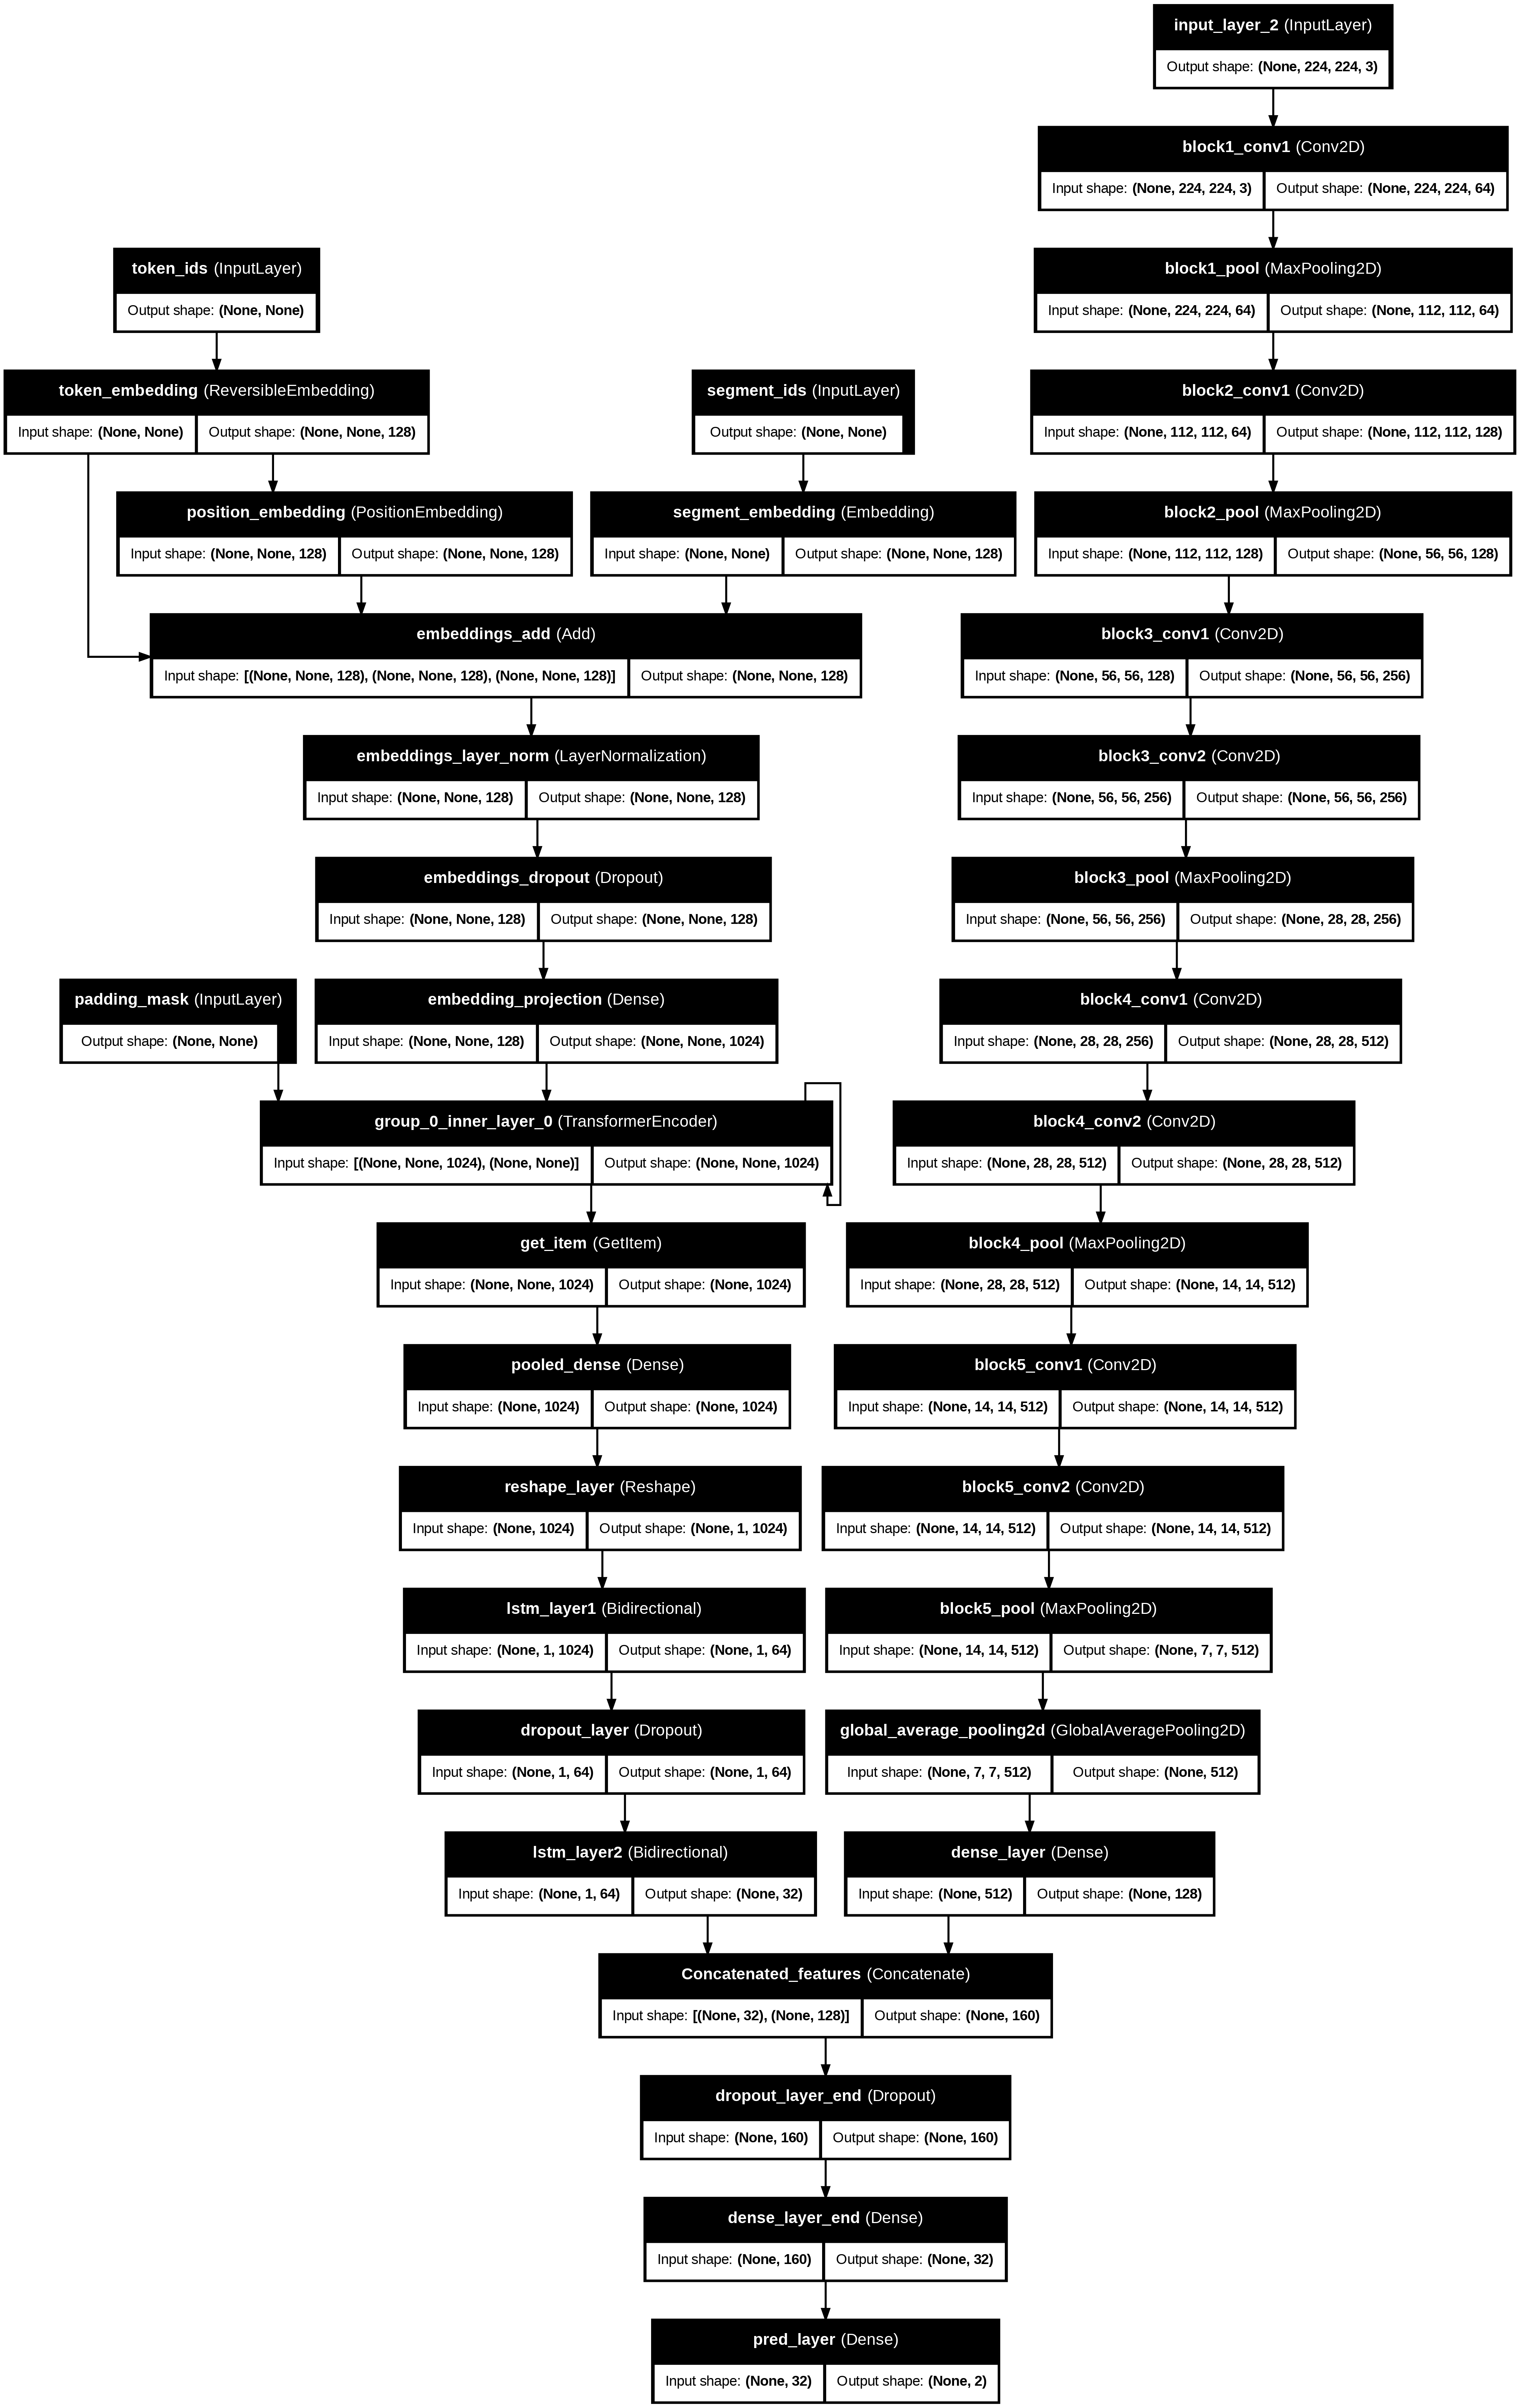

In [46]:
from keras.utils import plot_model
plot_model(model, to_file='/kaggle/working/model_plot.png', show_shapes=True, show_layer_names=True)

In [47]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=["accuracy"]
             )

In [48]:
X_train_img = X_train_img.astype('float32')
X_test_img = X_test_img.astype('float32')


In [49]:
Y_test[:5]

0    1
1    1
2    1
3    0
4    0
Name: label, dtype: int64

In [50]:
print(X_test_img.dtype)# Should be float32 if you're using VGG's preprocessor
print(X_train_img.dtype)

float32
float32


In [ ]:
# Fine tuning 
albert.backbone.trainable = True
for layer in vgg11.backbone.layers:
    layer.trainable = True

In [52]:
# Train the combined model
model.fit(
    x=[albert_preprocessor(X_train_txt), vgg11_preprocessor(X_train_img)],
    y=Y_train,                      
    epochs=25,                      
    batch_size=16,
    shuffle=True,
    validation_data=([albert_preprocessor(X_test_txt), vgg11_preprocessor(X_test_img)], Y_test)
)

Epoch 1/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.9886 - loss: 0.0418 - val_accuracy: 0.5503 - val_loss: 1.5992
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9851 - loss: 0.0619 - val_accuracy: 0.5839 - val_loss: 1.8063
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9890 - loss: 0.0478 - val_accuracy: 0.5369 - val_loss: 1.6674
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9930 - loss: 0.0300 - val_accuracy: 0.5906 - val_loss: 1.8185
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9813 - loss: 0.0562 - val_accuracy: 0.5705 - val_loss: 1.7947
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9881 - loss: 0.0358 - val_accuracy: 0.6309 - val_loss: 1.7116
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - accuracy: 0.9890 - loss: 0.0294 - val_accuracy: 0.5973 - val_loss: 1.8272
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - accuracy: 0.9817 - loss: 0.0476 - val_accuracy: 0.

In [ ]:
# Fine tuning 
albert.backbone.trainable = True
for layer in vgg11.backbone.layers:
    layer.trainable = True

In [ ]:
model.summary()

In [ ]:
model.fit(
    x=[albert_preprocessor(X_train_txt), vgg11_preprocessor(X_train_img)],
    y=Y_train,                      
    epochs=100,                      
    batch_size=32,                  
    validation_data=([albert_preprocessor(X_test_txt), vgg11_preprocessor(X_test_img)], Y_test)
)

In [ ]:
# Plot accuracy vs epoch
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss vs epoch
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict([albert_preprocessor(X_test_txt), vgg11_preprocessor(X_test_img)])

In [ ]:
threshold = 0.5

# Convert predicted probabilities to binary array
predicted = (predictions > threshold).astype(int)

In [ ]:
y_pred = predicted
y_test = Y_test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted') 

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted') 

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted') 

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# classification report for detailed metrics per class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(2)]))

In [ ]:
# Threshold value for considering a class as present
threshold = 0.5

# Convert predicted probabilities to binary array
predicted = (predictions > threshold).astype(int)

In [ ]:
accuracy_arr = []
f1_arr = []
precision_arr = []
recall_arr = []
Y_val = Y_test

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Evaluate accuracy
humour_accuracy = accuracy_score(Y_val[:,0], predicted[:,0])

# Calculate F1 score
humour_f1 = f1_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate precision
humour_precision = precision_score(Y_val[:,0], predicted[:,0], average='weighted')

# Calculate recall
humour_recall = recall_score(Y_val[:,0], predicted[:,0], average='weighted')

accuracy_arr.append(humour_accuracy)
f1_arr.append(humour_f1)
precision_arr.append(humour_precision)
recall_arr.append(humour_recall)

print("Score of Humour Detection")
print("Accuracy:", humour_accuracy)
print("F1 Score:", humour_f1)
print("Precision:", humour_precision)
print("Recall:", humour_recall)

In [ ]:
# Evaluate accuracy
sarcasm_accuracy = accuracy_score(Y_val[:,1], predicted[:,1])

# Calculate F1 score
sarcasm_f1 = f1_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate precision
sarcasm_precision = precision_score(Y_val[:,1], predicted[:,1], average='weighted')

# Calculate recall
sarcasm_recall = recall_score(Y_val[:,1], predicted[:,1], average='weighted')

accuracy_arr.append(sarcasm_accuracy)
f1_arr.append(sarcasm_f1)
precision_arr.append(sarcasm_precision)
recall_arr.append(sarcasm_recall)

print("Score of Sarcasm Detection")
print("Accuracy:", sarcasm_accuracy)
print("F1 Score:", sarcasm_f1)
print("Precision:", sarcasm_precision)
print("Recall:", sarcasm_recall)

In [ ]:
# Evaluate accuracy
offensive_accuracy = accuracy_score(Y_val[:,2], predicted[:,2])

# Calculate F1 score
offensive_f1 = f1_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate precision
offensive_precision = precision_score(Y_val[:,2], predicted[:,2], average='weighted')

# Calculate recall
offensive_recall = recall_score(Y_val[:,2], predicted[:,2], average='weighted')

accuracy_arr.append(offensive_accuracy)
f1_arr.append(offensive_f1)
precision_arr.append(offensive_precision)
recall_arr.append(offensive_recall)

print("Score of Offensive Detection")
print("Accuracy:", offensive_accuracy)
print("F1 Score:", offensive_f1)
print("Precision:", offensive_precision)
print("Recall:", offensive_recall)

In [ ]:
# Evaluate accuracy
motivation_accuracy = accuracy_score(Y_val[:,3], predicted[:,3])

# Calculate F1 score
motivation_f1 = f1_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate precision
motivation_precision = precision_score(Y_val[:,3], predicted[:,3], average='weighted')

# Calculate recall
motivation_recall = recall_score(Y_val[:,3], predicted[:,3], average='weighted')

accuracy_arr.append(motivation_accuracy)
f1_arr.append(motivation_f1)
precision_arr.append(motivation_precision)
recall_arr.append(motivation_recall)

print("Score of Motivation Detection")
print("Accuracy:", motivation_accuracy)
print("F1 Score:", motivation_f1)
print("Precision:", motivation_precision)
print("Recall:", motivation_recall)

In [ ]:
accuracy_arr = np.array(accuracy_arr)
f1_arr = np.array(f1_arr)
precision_arr = np.array(precision_arr)
recall_arr = np.array(recall_arr)
print("Average scores :")
print("Avg accuracy:",np.mean(accuracy_arr))
print("Avg f1 score:",np.mean(f1_arr))
print("Avg precision",np.mean(precision_arr))
print("Avg recall:",np.mean(recall_arr))

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, roc_curve, auc
import seaborn as sns

In [ ]:
conf_matrices = multilabel_confusion_matrix(Y_test, predicted)

# Print for each label
labels = ['humour', 'sarcasm', 'offensive', 'motivational']
for i, cm in enumerate(conf_matrices):
    print(f"\nConfusion Matrix for {labels[i]}:")
    print(cm)

In [ ]:
labels = ['humour', 'sarcasm', 'offensive', 'motivational']

# Show each matrix one by one
for i, label in enumerate(labels):
    cm = conf_matrices[i]

    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{label.capitalize()} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0.5, 1.5], ['0', '1'])
    plt.yticks([0.5, 1.5], ['0', '1'])
    plt.tight_layout()
    plt.show()

In [ ]:
class_names = ['humour', 'sarcasm', 'offensive', 'motivational']

# Plot ROC for each label
plt.figure(figsize=(8, 6))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(Y_test[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=1)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-label Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()